In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("modified_healthcare_dataset.csv")

# Display the first few rows and basic info
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay
0,Bobby Jackson,19,Female,AB+,Infections,1/31/2024,Matthew Smith,Northwestern Memorial Hospital,Blue Cross,2212.272701,328,Emergency,2/7/2024,Azithromycin,Normal,7
1,Leslie Terry,15,Female,B-,Flu,8/20/2019,Samantha Davies,UI Health (University of Illinois Hospital),UnitedHealthcare,3185.161388,265,Emergency,8/22/2019,Tamiflu,Abnormal,2
2,Danny Smith,50,Female,A+,Cancer,9/22/2022,Tiffany Mitchell,UI Health (University of Illinois Hospital),Blue Cross,72055.214060,205,Elective,10/30/2022,Cisplatin,Inconclusive,38
3,Andrew Watts,24,Female,O+,Asthma,11/18/2020,Kevin Wells,UI Health (University of Illinois Hospital),Aetna,4092.601229,450,Elective,11/19/2020,Prednisone,Normal,1
4,Adrienne Bell,80,Female,A+,Heart Disease,9/19/2022,Kathleen Hanna,Northwestern Memorial Hospital,Cigna,47985.660250,458,Routine,10/27/2022,Beta-blockers,Inconclusive,38


In [2]:
# Step 3: Data Cleaning

# Check for missing values and data types
missing_values = df.isnull().sum()
data_types = df.dtypes

# Check for duplicates
duplicates = df.duplicated().sum()

# Summary of numeric columns
numeric_summary = df.describe()

missing_values, data_types, duplicates, numeric_summary



(Name                  0
 Age                   0
 Gender                0
 Blood Type            0
 Medical Condition     0
 Date of Admission     0
 Doctor                0
 Hospital              0
 Insurance Provider    0
 Billing Amount        0
 Room Number           0
 Admission Type        0
 Discharge Date        0
 Medication            0
 Test Results          0
 Length of Stay        0
 dtype: int64,
 Name                   object
 Age                     int64
 Gender                 object
 Blood Type             object
 Medical Condition      object
 Date of Admission      object
 Doctor                 object
 Hospital               object
 Insurance Provider     object
 Billing Amount        float64
 Room Number             int64
 Admission Type         object
 Discharge Date         object
 Medication             object
 Test Results           object
 Length of Stay          int64
 dtype: object,
 np.int64(0),
                 Age  Billing Amount   Room Number  Length 

In [3]:
# Convert date columns to datetime
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"])
df["Discharge Date"] = pd.to_datetime(df["Discharge Date"])

# Calculate new Length of Stay based on dates
df["Calculated Stay"] = (df["Discharge Date"] - df["Date of Admission"]).dt.days

# Compare with existing "Length of Stay"
stay_diff = (df["Calculated Stay"] != df["Length of Stay"]).sum()

# Unique values in categorical fields to check consistency
unique_values = {
    "Gender": df["Gender"].unique(),
    "Blood Type": df["Blood Type"].unique(),
    "Medical Condition": df["Medical Condition"].unique(),
    "Admission Type": df["Admission Type"].unique(),
    "Test Results": df["Test Results"].unique(),
}

stay_diff, unique_values


(np.int64(0),
 {'Gender': array(['Female', 'Male'], dtype=object),
  'Blood Type': array(['AB+', 'B-', 'A+', 'O+', 'O-', 'AB-', 'A-', 'B+'], dtype=object),
  'Medical Condition': array(['Infections', 'Flu', 'Cancer', 'Asthma', 'Heart Disease',
         'Alzheimer’s', 'Diabetes', 'Obesity'], dtype=object),
  'Admission Type': array(['Emergency', 'Elective', 'Routine', 'Urgent'], dtype=object),
  'Test Results': array(['Normal', 'Abnormal', 'Inconclusive'], dtype=object)})

In [31]:
from scipy import stats

# Compute Z-scores
z_scores = stats.zscore(df.select_dtypes(include=['number']))

# Identify outliers
outliers = (abs(z_scores) > 3).any(axis=1)

# Remove outliers
df_no_outliers = df[~outliers]

print("Original size:", df.shape, "After outlier removal:", df_no_outliers.shape)

Original size: (55500, 19) After outlier removal: (53761, 19)


In [32]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Length of Stay'])  
y = df['Length of Stay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (44400, 18)
Testing set size: (11100, 18)


In [36]:
from sklearn.feature_selection import SelectKBest, f_classif

# Ensure all columns are numeric
X_train_numeric = X_train.select_dtypes(include=['number'])

# Apply feature selection
selector = SelectKBest(score_func=f_classif, k=min(5, X_train_numeric.shape[1]))  # Avoid selecting more features than available
X_selected = selector.fit_transform(X_train_numeric, y_train)

# Get selected feature names
selected_features = X_train_numeric.columns[selector.get_support()]

print("Selected Features:", list(selected_features))

Selected Features: ['Age', 'Room Number', 'Medical Condition Encoded', 'Stay Category Encoded']


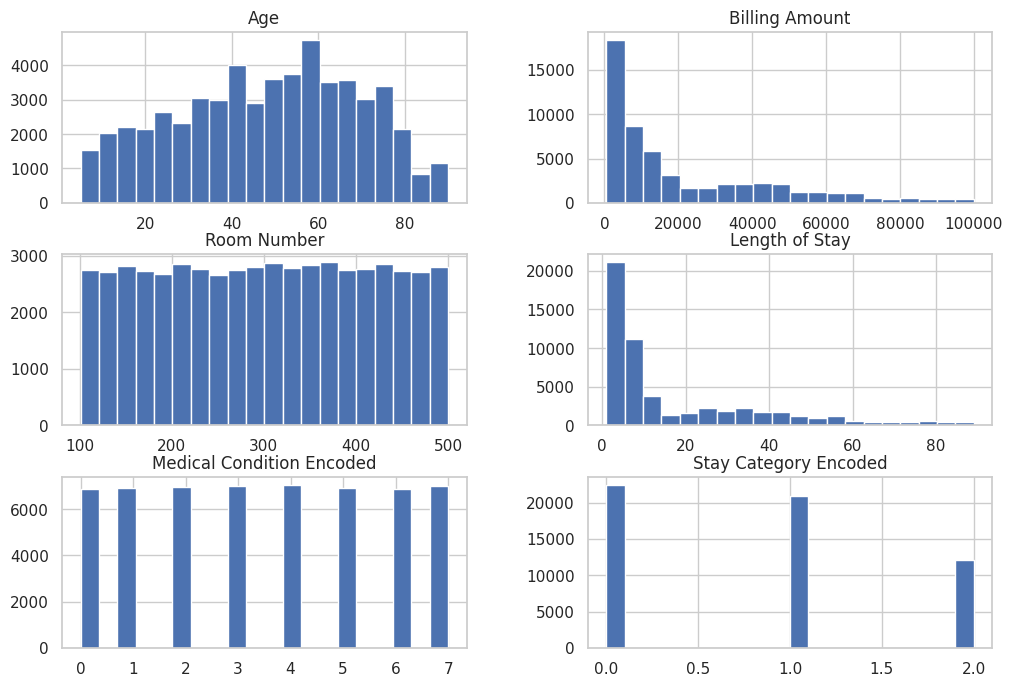

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for numerical features
df.hist(figsize=(12, 8), bins=20)
plt.show()


In [44]:
%pip install seaborn

<ipython-input-45-46deb1b305e9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Admission Type", y="Length of Stay", palette="Set3")


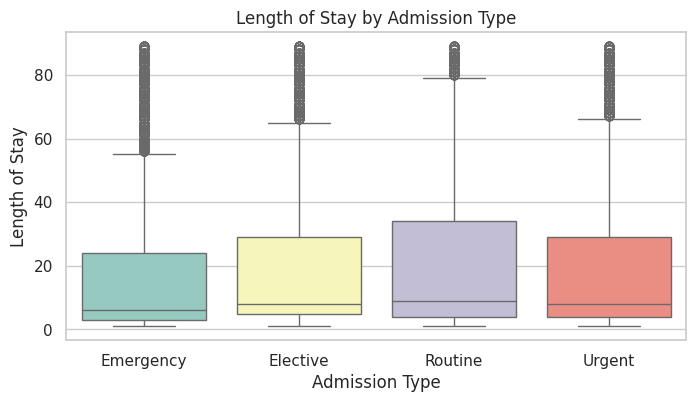

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="Admission Type", y="Length of Stay", palette="Set3")
plt.title("Length of Stay by Admission Type")
plt.show()


<ipython-input-46-6df18fcd83eb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Medical Condition", y="Length of Stay", palette="pastel")


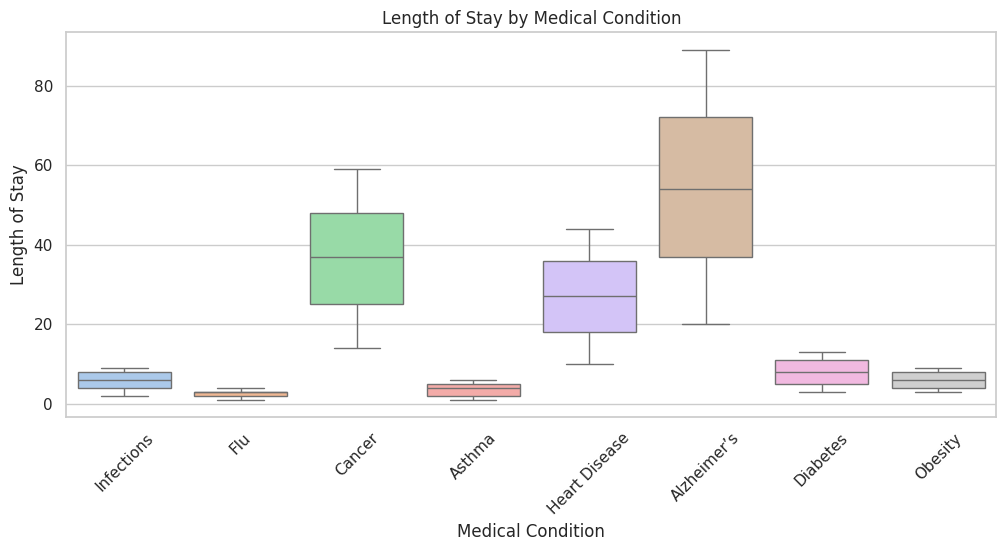

In [46]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x="Medical Condition", y="Length of Stay", palette="pastel")
plt.xticks(rotation=45)
plt.title("Length of Stay by Medical Condition")
plt.show()


In [47]:
df.corr(numeric_only=True)["Length of Stay"].sort_values(ascending=False)


Length of Stay               1.000000
Age                          0.677092
Billing Amount               0.626954
Room Number                 -0.003330
Medical Condition Encoded   -0.487057
Stay Category Encoded       -0.721271
Name: Length of Stay, dtype: float64

<ipython-input-48-f473f833e7fb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Test Results", y="Length of Stay", palette="Set2")


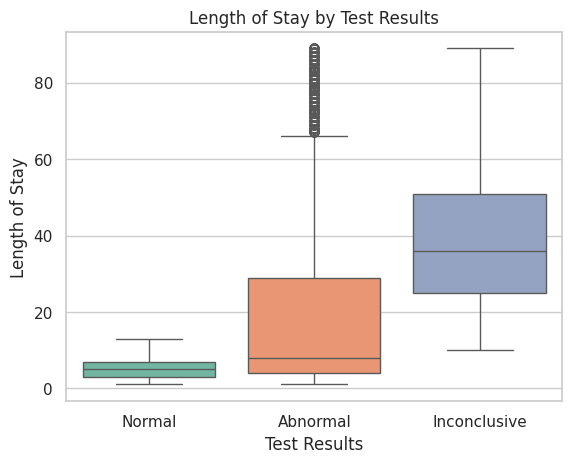

In [48]:
sns.boxplot(data=df, x="Test Results", y="Length of Stay", palette="Set2")
plt.title("Length of Stay by Test Results")
plt.show()


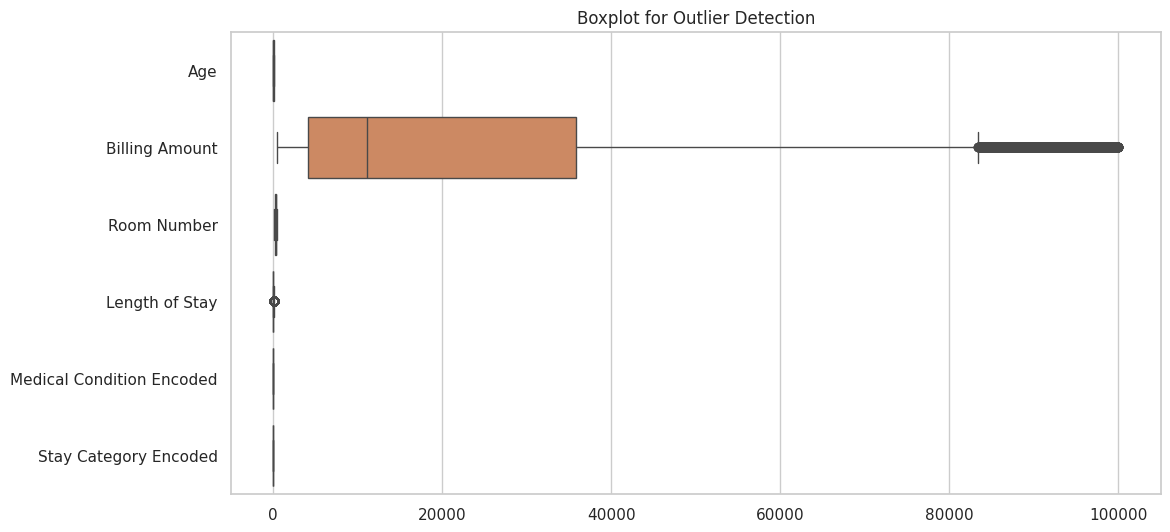

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot for Outlier Detection")
plt.show()

In [54]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ["Gender", "Blood Type", "Medical Condition", "Admission Type", "Insurance Provider", "Test Results"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
correlation = df.corr(numeric_only=True)["Length of Stay"].sort_values(ascending=False)
print(correlation)

Length of Stay               1.000000
Age                          0.677092
Billing Amount               0.626954
Admission Type               0.020172
Gender                      -0.002520
Room Number                 -0.003330
Blood Type                  -0.003339
Insurance Provider          -0.005599
Test Results                -0.226167
Medical Condition           -0.487057
Medical Condition Encoded   -0.487057
Stay Category Encoded       -0.721271
Name: Length of Stay, dtype: float64


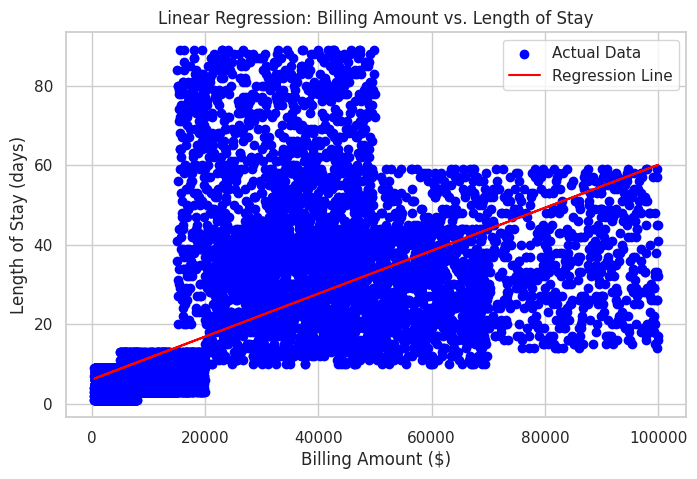

{'Intercept (θ0)': np.float64(6.052515332695565),
 'Slope (θ1)': np.float64(0.0005403323706218066),
 'Mean Squared Error': 248.55067000182856,
 'R-squared Score': 0.39185049541392847}

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Independent variable (predictor): Billing Amount
# Dependent variable (target): Length of Stay
X = df[['Billing Amount']].values
y = df['Length of Stay'].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color="blue", label="Actual Data")
plt.plot(X_test, y_pred, color="red", label="Regression Line")
plt.xlabel("Billing Amount ($)")
plt.ylabel("Length of Stay (days)")
plt.title("Linear Regression: Billing Amount vs. Length of Stay")
plt.legend()
plt.grid(True)
plt.show()

# Display model metrics
model_params = {
    "Intercept (θ0)": model.intercept_,
    "Slope (θ1)": model.coef_[0],
    "Mean Squared Error": mse,
    "R-squared Score": r2,
}

model_params


In [56]:
from sklearn.preprocessing import LabelEncoder

# Encode selected categorical features
categorical_cols = ["Gender", "Blood Type", "Medical Condition", "Admission Type", "Insurance Provider", "Test Results"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
# Independent variables (features)
X = df[["Age", "Gender", "Blood Type", "Medical Condition", "Admission Type",
        "Billing Amount", "Insurance Provider", "Test Results"]]

# Dependent variable (target)
y = df["Length of Stay"]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [57]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

model_params = {
    "Intercept (θ0)": model.intercept_,
    "Coefficients": dict(zip(X.columns, model.coef_)),
    "Mean Squared Error": mse,
    "R-squared Score": r2
}

print(model_params)


{'Intercept (θ0)': np.float64(3.553213135153179), 'Coefficients': {'Age': np.float64(0.39214596303259946), 'Gender': np.float64(0.02157776136910126), 'Blood Type': np.float64(-0.03407726302334112), 'Medical Condition': np.float64(-2.5524314292722834), 'Admission Type': np.float64(0.2076139902156425), 'Billing Amount': np.float64(0.00023864578710926926), 'Insurance Provider': np.float64(-0.06161822479136966), 'Test Results': np.float64(-1.0677432500009527)}, 'Mean Squared Error': 164.93759790933126, 'R-squared Score': 0.5964335221649633}


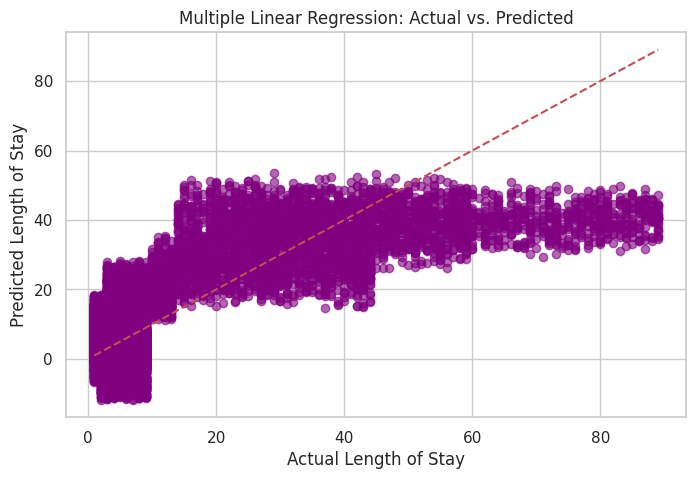

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # identity line
plt.xlabel("Actual Length of Stay")
plt.ylabel("Predicted Length of Stay")
plt.title("Multiple Linear Regression: Actual vs. Predicted")
plt.grid(True)
plt.show()


In [59]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset
file_path = "modified_healthcare_dataset.csv"
df = pd.read_csv(file_path)

# Encode categorical variables to numeric
le = LabelEncoder()
df["Medical Condition Encoded"] = le.fit_transform(df["Medical Condition"])

# Define predictors and target
X_multi = df[["Age", "Billing Amount", "Medical Condition Encoded"]]
y = df["Length of Stay"]

# Ensure all X values are numeric
X_multi = X_multi.astype(float)

# Add constant for intercept
X_multi = sm.add_constant(X_multi)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Fit the model
model_multi = sm.OLS(y_train, X_train).fit()

# Predict and evaluate
y_pred = model_multi.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display summary
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
model_summary = model_multi.summary()
model_summary


Mean Squared Error: 165.90507058539575
R-squared Score: 0.5940663266605422


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Length of Stay   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                 2.213e+04
Date:                Wed, 04 Jun 2025   Prob (F-statistic):               0.00
Time:                        21:26:20   Log-Likelihood:            -1.7634e+05
No. Observations:               44400   AIC:                         3.527e+05
Df Residuals:                   44396   BIC:                         3.527e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         2.5056      0.208     12.061      0.000       2.098       2.913
Age                           0.3958      0.004    104.104      0.000       0.388       0.403
Billing Amount                0.0002   3.39e-06     72.367      0.000       0.000       0.000
Medical Condition Encoded    -2.5763      0.028    -91.919      0.000      -2.631      -2.521
==============================================================================
Omnibus:                     7378.642   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14793.017
Skew:                           1.013   Prob(JB):                         0.00
Kurtosis:                       4.973   Cond. No.                     1.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

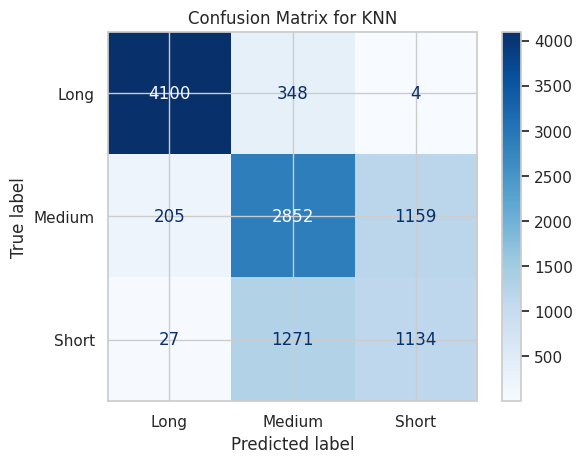

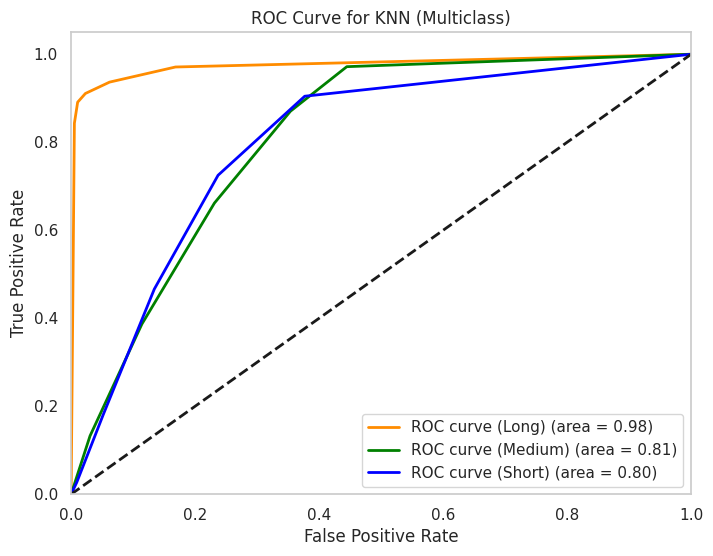

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Load your dataset
file_path = "modified_healthcare_dataset.csv"
df = pd.read_csv(file_path)

# Feature engineering: convert Length of Stay into categorical target
def categorize_stay(days):
    if days <= 3:
        return "Short"
    elif days <= 10:
        return "Medium"
    else:
        return "Long"

df["Stay Category"] = df["Length of Stay"].apply(categorize_stay)

# Encode categorical features
le_condition = LabelEncoder()
df["Medical Condition Encoded"] = le_condition.fit_transform(df["Medical Condition"])

le_target = LabelEncoder()
df["Stay Category Encoded"] = le_target.fit_transform(df["Stay Category"])

# Select features and target
X = df[["Age", "Billing Amount", "Medical Condition Encoded"]]
y = df["Stay Category Encoded"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_target.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for KNN")
plt.show()

# ROC Curve — One-vs-Rest for multiclass
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = knn.predict_proba(X_test)
fpr, tpr, roc_auc = {}, {}, {}

for i in range(3):  # 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['darkorange', 'green', 'blue']
for i, label in enumerate(le_target.classes_):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'ROC curve ({label}) (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN (Multiclass)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [84]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Step 1: Load and preprocess your dataset
df = pd.read_csv("modified_healthcare_dataset.csv")

# Step 2: Drop irrelevant string columns (or encode them if needed)
# You can encode some categorical columns that make sense numerically
le = LabelEncoder()
df["Medical Condition Encoded"] = le.fit_transform(df["Medical Condition"])
df["Admission Type Encoded"] = le.fit_transform(df["Admission Type"])
df["Test Results Encoded"] = le.fit_transform(df["Test Results"])
df["Insurance Provider Encoded"] = le.fit_transform(df["Insurance Provider"])

# Step 3: Define a clean numeric feature set
X = df[[
    "Age",
    "Billing Amount",
    "Room Number",
    "Medical Condition Encoded",
    "Admission Type Encoded",
    "Test Results Encoded",
    "Insurance Provider Encoded",
    "Length of Stay"  # You can include this temporarily if needed
]]

# Step 4: Define target and remove it from features
y = X["Length of Stay"]
X = X.drop(columns=["Length of Stay"])

# Step 5: Apply RFE
model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

# Step 6: Show selected features
selected_features = X.columns[rfe.support_]
print("Selected Features by RFE:\n", selected_features)

Selected Features by RFE:
 Index(['Age', 'Billing Amount', 'Room Number', 'Medical Condition Encoded',
       'Insurance Provider Encoded'],
      dtype='object')


Linear SVM Accuracy: 0.9742215785662564
              precision    recall  f1-score   support

      Benign       0.96      0.97      0.96      2436
   Malignant       0.98      0.98      0.98      4469

    accuracy                           0.97      6905
   macro avg       0.97      0.97      0.97      6905
weighted avg       0.97      0.97      0.97      6905

RBF SVM Accuracy: 0.9853729181752353
              precision    recall  f1-score   support

      Benign       1.00      0.96      0.98      2436
   Malignant       0.98      1.00      0.99      4469

    accuracy                           0.99      6905
   macro avg       0.99      0.98      0.98      6905
weighted avg       0.99      0.99      0.99      6905



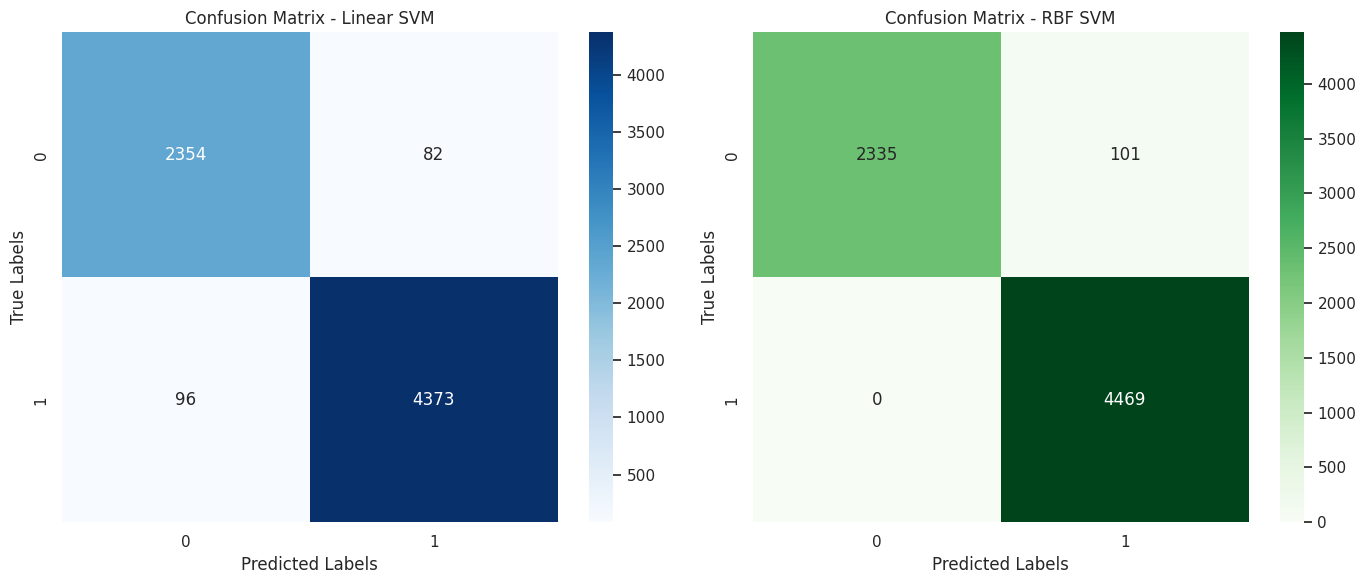

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9820405366905535
Best Model Accuracy on Test Set: 0.9853729181752353


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your healthcare dataset
df = pd.read_csv("modified_healthcare_dataset.csv")

# Step 1: Binary classification target (Benign vs Malignant)
def stay_type(length):
    if length <= 3:
        return 'Benign'
    elif length > 10:
        return 'Malignant'
    else:
        return 'Medium'

df["Stay Type"] = df["Length of Stay"].apply(stay_type)
df = df[df["Stay Type"] != "Medium"]  # remove 'Medium' for binary classification

# Step 2: Encode categorical feature
le_condition = LabelEncoder()
df["Medical Condition Encoded"] = le_condition.fit_transform(df["Medical Condition"])

# Encode target labels
le = LabelEncoder()
df["Stay Type Encoded"] = le.fit_transform(df["Stay Type"])  # Benign = 0, Malignant = 1

# Step 3: Define features and target
X = df[["Age", "Billing Amount", "Medical Condition Encoded"]]
y = df["Stay Type Encoded"]

# Step 4: Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train Linear SVM
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)

# Step 6: Train RBF SVM
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Step 7: Evaluation
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear, target_names=le.classes_))
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf, target_names=le.classes_))

# Step 8: Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Linear SVM')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

sns.heatmap(confusion_matrix(y_test, y_pred_rbf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix - RBF SVM')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

# Step 9: Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best model results
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)

print("Best Model Accuracy on Test Set:", accuracy_score(y_test, y_pred_best))


In [93]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, VotingClassifier
)
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
results['Random Forest'] = accuracy_score(y_test, rf.predict(X_test))
ab = AdaBoostClassifier(n_estimators=50, random_state=42)
ab.fit(X_train, y_train)
results['AdaBoost'] = accuracy_score(y_test, ab.predict(X_test))
voting = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=1000)),
    ('knn', KNeighborsClassifier()),
    ('nb', GaussianNB())
], voting='hard')

voting.fit(X_train, y_train)
results['Voting Ensemble'] = accuracy_score(y_test, voting.predict(X_test))


✅ Accuracy Summary:
                 Model  Accuracy
0  Logistic Regression  0.972339
1  K-Nearest Neighbors  0.963505
2          Naive Bayes  0.967849

📋 Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2436
           1       0.98      0.97      0.98      4469

    accuracy                           0.97      6905
   macro avg       0.97      0.97      0.97      6905
weighted avg       0.97      0.97      0.97      6905


📋 Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2436
           1       0.97      0.97      0.97      4469

    accuracy                           0.96      6905
   macro avg       0.96      0.96      0.96      6905
weighted avg       0.96      0.96      0.96      6905


📋 Classification Report for Naive Bayes:

              precision    recall  f1-score   su

<ipython-input-94-07f17f34dc52>:36: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from current font.
  plt.tight_layout()
/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


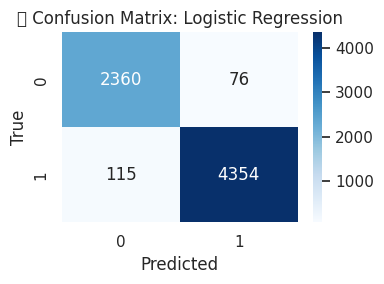

<ipython-input-94-07f17f34dc52>:36: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from current font.
  plt.tight_layout()
/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


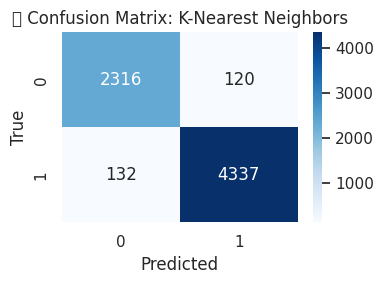

<ipython-input-94-07f17f34dc52>:36: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from current font.
  plt.tight_layout()
/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


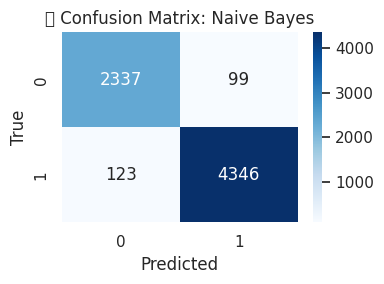

In [94]:
results = {}
reports = {}
conf_matrices = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    # Classification report (dictionary format for later use)
    reports[name] = classification_report(y_test, y_pred, output_dict=True)

    # Confusion matrix
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

# Summary table with Accuracy
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print("\n✅ Accuracy Summary:")
print(results_df)

# Detailed classification reports
for name, report in reports.items():
    print(f"\n📋 Classification Report for {name}:\n")
    print(classification_report(y_test, models[name].predict(X_test)))

# Confusion matrices
for name, matrix in conf_matrices.items():
    plt.figure(figsize=(4, 3))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'🧩 Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()


🗳️ Hard Voting Accuracy: 0.9706010137581462
📋 Classification Report (Hard Voting):
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2436
           1       0.98      0.97      0.98      4469

    accuracy                           0.97      6905
   macro avg       0.97      0.97      0.97      6905
weighted avg       0.97      0.97      0.97      6905



<ipython-input-95-2447d1d63084>:29: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from current font.
  plt.tight_layout()
/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


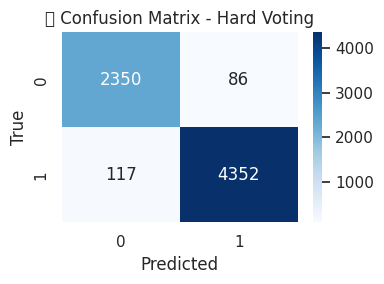


🗳️ Soft Voting Accuracy: 0.9704561911658218
📋 Classification Report (Soft Voting):
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2436
           1       0.98      0.97      0.98      4469

    accuracy                           0.97      6905
   macro avg       0.97      0.97      0.97      6905
weighted avg       0.97      0.97      0.97      6905



<ipython-input-95-2447d1d63084>:44: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from current font.
  plt.tight_layout()
/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


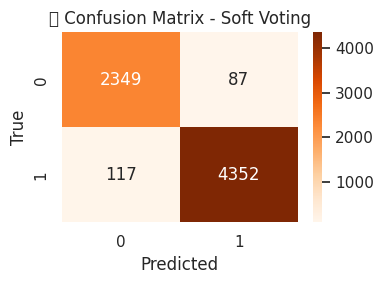

In [95]:
lr = LogisticRegression(max_iter=1000)
nb = GaussianNB()
knn = KNeighborsClassifier()

# Hard Voting
voting_hard = VotingClassifier(
    estimators=[('lr', lr), ('nb', nb), ('knn', knn)],
    voting='hard'
)

# Soft Voting
voting_soft = VotingClassifier(
    estimators=[('lr', lr), ('nb', nb), ('knn', knn)],
    voting='soft'
)

# === Train & Evaluate Hard Voting ===
voting_hard.fit(X_train, y_train)
y_pred_hard = voting_hard.predict(X_test)
print("🗳️ Hard Voting Accuracy:", accuracy_score(y_test, y_pred_hard))
print("📋 Classification Report (Hard Voting):")
print(classification_report(y_test, y_pred_hard))

plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_hard), annot=True, fmt='d', cmap='Blues')
plt.title('🧩 Confusion Matrix - Hard Voting')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# === Train & Evaluate Soft Voting ===
voting_soft.fit(X_train, y_train)
y_pred_soft = voting_soft.predict(X_test)
print("\n🗳️ Soft Voting Accuracy:", accuracy_score(y_test, y_pred_soft))
print("📋 Classification Report (Soft Voting):")
print(classification_report(y_test, y_pred_soft))

plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_soft), annot=True, fmt='d', cmap='Oranges')
plt.title('🧩 Confusion Matrix - Soft Voting')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


In [96]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

bagging_model = BaggingClassifier(
    estimator=LogisticRegression(max_iter=1000),
    n_estimators=10,
    random_state=42
)
bagging_model.fit(X_train, y_train)
print("Bagging Accuracy:", bagging_model.score(X_test, y_test))

Bagging Accuracy: 0.9724837074583635


In [97]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

boosting_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
boosting_model.fit(X_train, y_train)
print("Boosting Accuracy:", boosting_model.score(X_test, y_test))

Boosting Accuracy: 0.9850832729905865


In [98]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Define base learners
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('knn', KNeighborsClassifier()),
    ('nb', GaussianNB())
]

# Meta-learner (final decision)
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5
)

stacking_model.fit(X_train, y_train)
print("Stacking Accuracy:", stacking_model.score(X_test, y_test))

Stacking Accuracy: 0.976249094858798


                  Model  Accuracy  Precision    Recall  F1-score
0      Bagging (LogReg)  0.972484   0.972643  0.972484  0.972531
1       Boosting (Tree)  0.985083   0.985373  0.985083  0.985012
2  Stacking (LR+KNN+NB)  0.976249   0.976264  0.976249  0.976256
3    Voting (LR+KNN+NB)  0.970601   0.970727  0.970601  0.970643


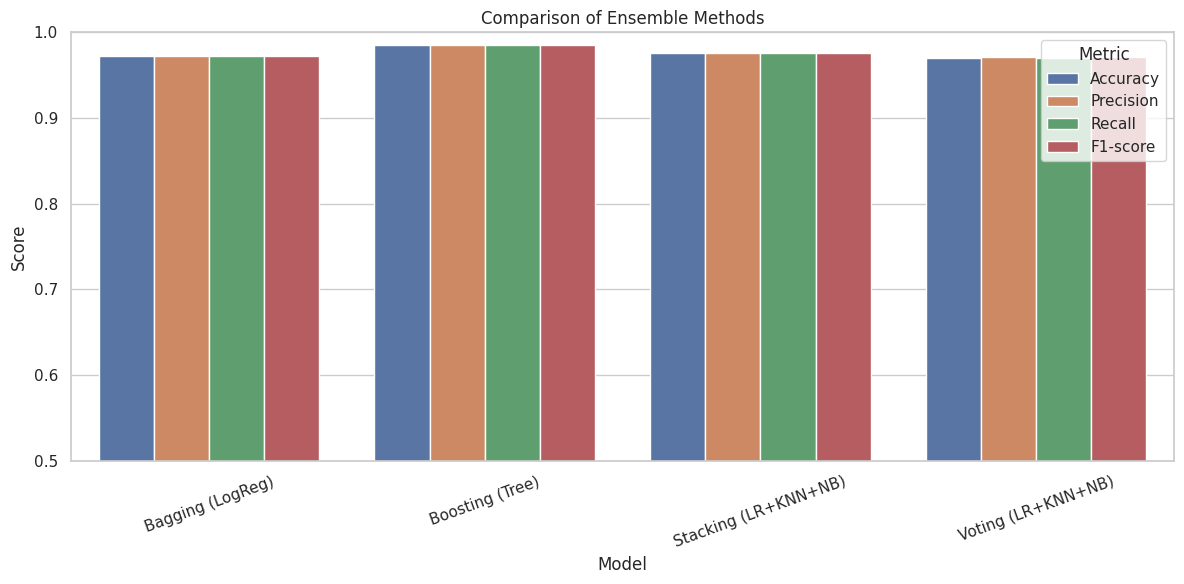

In [100]:
#Define models
models = {
    "Bagging (LogReg)": BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=10, random_state=42),
    "Boosting (Tree)": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=50, random_state=42),
    "Stacking (LR+KNN+NB)": StackingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=1000)),
            ('knn', KNeighborsClassifier()),
            ('nb', GaussianNB())
        ],
        final_estimator=LogisticRegression(),
        cv=5
    ),
    "Voting (LR+KNN+NB)": VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=1000)),
            ('knn', KNeighborsClassifier()),
            ('nb', GaussianNB())
        ],
        voting='hard'
    )
}

# Collect metrics
summary = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    summary.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-score": report['weighted avg']['f1-score']
    })

df_summary = pd.DataFrame(summary)
print(df_summary)

# Visual comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=df_summary.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Model', y='Score', hue='Metric')
plt.title('Comparison of Ensemble Methods')
plt.xticks(rotation=20)
plt.ylim(0.5, 1)
plt.tight_layout()
plt.show()

🌲 Random Forest Accuracy: 0.9780


<ipython-input-101-bb92c29ca240>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_importances, x='Importance', y='Feature', palette='Blues_r')
<ipython-input-101-bb92c29ca240>:25: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from current font.
  plt.tight_layout()
/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


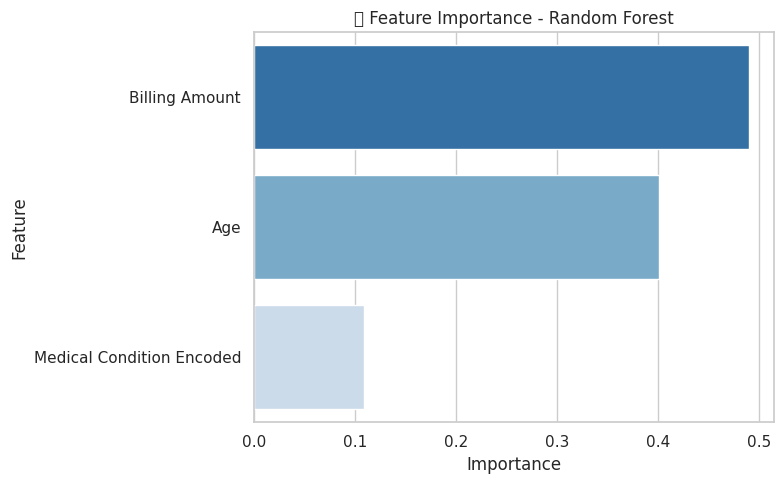


📋 Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2436
           1       0.98      0.98      0.98      4469

    accuracy                           0.98      6905
   macro avg       0.98      0.98      0.98      6905
weighted avg       0.98      0.98      0.98      6905



<ipython-input-101-bb92c29ca240>:38: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from current font.
  plt.tight_layout()
/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


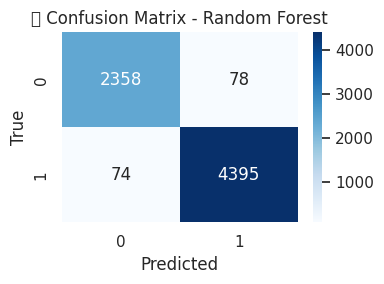

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Accuracy
rf_acc = accuracy_score(y_test, rf_pred)
print(f"🌲 Random Forest Accuracy: {rf_acc:.4f}")
# Feature Importance - Random Forest
import pandas as pd

rf_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=rf_importances, x='Importance', y='Feature', palette='Blues_r')
plt.title('🌲 Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

# Classification Report
print("\n📋 Classification Report (Random Forest):")
print(classification_report(y_test, rf_pred))

# Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('🧩 Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:26:13] WARNING: /root/repo/packages/xgboost/build/xgboost-2.1.2/cpp_src/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
<ipython-input-102-d3b81990b3af>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_importances, x='Importance', y='Feature', palette='Blues_r')
<ipython-input-102-d3b81990b3af>:18: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from current font.
  plt.tight_layout()
/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


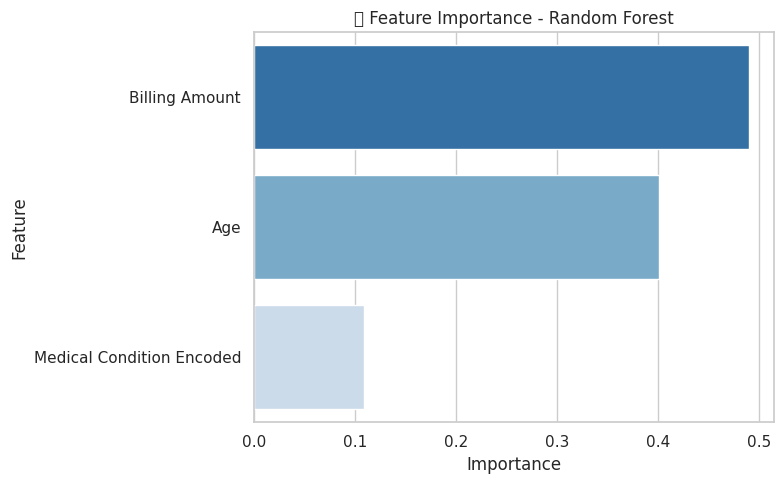

🚀 XGBoost Accuracy: 0.9815

📋 Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2436
           1       0.98      0.99      0.99      4469

    accuracy                           0.98      6905
   macro avg       0.98      0.98      0.98      6905
weighted avg       0.98      0.98      0.98      6905



<ipython-input-102-d3b81990b3af>:35: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from current font.
  plt.tight_layout()
/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


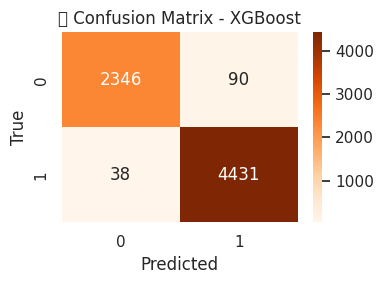

In [102]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
# Feature Importance - Random Forest
import pandas as pd

rf_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=rf_importances, x='Importance', y='Feature', palette='Blues_r')
plt.title('🌲 Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

# Accuracy
xgb_acc = accuracy_score(y_test, xgb_pred)
print(f"🚀 XGBoost Accuracy: {xgb_acc:.4f}")

# Classification Report
print("\n📋 Classification Report (XGBoost):")
print(classification_report(y_test, xgb_pred))

# Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='d', cmap='Oranges')
plt.title('🧩 Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()